# Microeconomics in Python (Kuroki, 2021)

In [1]:
from sympy import *

## Exemplo -1: Receita Total

In [2]:
# Definindo a função de demanda
Q = symbols('Q') # Define Q como símbolo
P = 100 - 2*Q    # Define a função de demanda
P                # Mostra a demanda

100 - 2*Q

In [3]:
# Definir a receita total
RT = P*Q 
RT

Q*(100 - 2*Q)

In [4]:
# Primeira derivada da função de receita. Função diff(y(x), x) - diferencia a função y(x) em relação a x
diff(RT, Q)

100 - 4*Q

In [5]:
# Primeira derivada igual a zero: função solve. Vamos usar diff dentro de solve (outra forma seria salvar o resultado anterior e colocar dentro da função solve)
solve(diff(RT, Q))

[25]

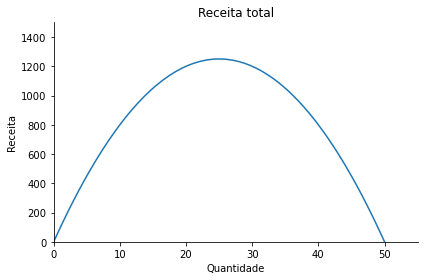

In [6]:
plot(RT, (Q, 0, 50), ylim = (0, 1500), xlim = (0, 55), title = "Receita total", xlabel = "Quantidade", ylabel = "Receita")

## Exemplo 0: Minimização de custos

$CT = 5600 + 27Q - 6Q^2 + 0.5Q^3$

Dois resultados nesse exemplo. 

In [7]:
Q = symbols('Q', positive = True) # Define Q como símbolo, e não negativo, outra forma seria incluir nonnegative = True
CT = 5600 + 27*Q - 6*Q**2 + 0.5*Q**3
CT

0.5*Q**3 - 6*Q**2 + 27*Q + 5600

In [8]:
CTM = CT/Q
CTM

(0.5*Q**3 - 6*Q**2 + 27*Q + 5600)/Q

In [9]:
dCTM = diff(CTM, Q)
dCTM

(1.5*Q**2 - 12*Q + 27)/Q - (0.5*Q**3 - 6*Q**2 + 27*Q + 5600)/Q**2

In [10]:
solve(dCTM)

[20.0000000000000]

## Exemplo 1: Maximização da utilidade:

$ U = 8X^{0.5}Y^{0.5}$

In [11]:
X, Y = symbols('X, Y')
U = 8*X**0.5*Y**0.5

In [12]:
Px = 10
Py = 8
m = 400

In [13]:
RO = Eq(m, Px*X + Py*Y)

In [14]:
TMS = Eq(diff(U,X)/diff(U,Y), Px/Py) # Taxa marginal de substituição é igual a razão de preços
solve((TMS, RO))

{X: 20.0000000000000, Y: 25.0000000000000}

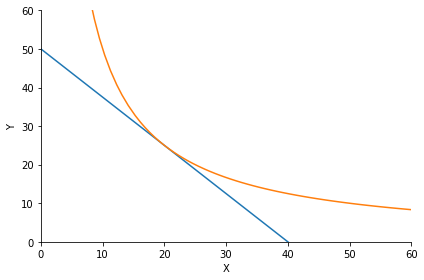

In [15]:
# Ponto de maximização 
maxU = U.subs({X: 20, Y: 25})
# ou maxU = U.subs([(X, 20), (Y, 25)])
RO2 = (m-Px*X)/Py
indif = (maxU/(8*sqrt(X)))**2
plot(RO2, indif, (X, 0, 60), ylim = (0, 60), xlim = (0, 60), xlabel = 'X', ylabel ='Y')

## Exemplo 2: Equilíbrio Geral

$U_A(X, Y)=X^2Y$

$U_B(X,Y)=3ln(X)+2Y$



In [16]:
Px, Py, xA, xB, yA, yB = symbols('Px, Py, xA, xB, yA, yB', positive=True)
UA = (xA**2)*yA
UB = 3*log(xB)+2*yB
WxA, WxB = 7, 0 # Dotação de A e B para X
WyA, WyB = 3, 4 # Dotação de A e B para Y
Px = 1
xO = WxA + WxB # Oferta total de X
yO = WyA + WyB # Oferta total de Y
xD = xA + xB # Demanda total por X
yD = yA + yB # Demanda total por Y
RendaA = Px*WxA + Py*WyA # Renda de A
RendaB = Px*WxB + Py*WyB # Renda de B
GastoA = Px*xA + Py*yA # Gasto de A
GastoB = Px*xB + Py*yB # Gasto de B
EqA = Eq(diff(UA, xA)/diff(UA, yA), Px/Py) # Equilíbrio para A: TMS = razão de preços
EqB = Eq(diff(UB, xB)/diff(UB, yB), Px/Py) # Equilíbrio para A: TMS = razão de preços
ROA = Eq(RendaA, GastoA) # Restrição Orçamentária de A
ROB = Eq(RendaB, GastoB) # Restrição Orçamentária de B
EqX = Eq(xO, xD) # Equilíbrio no mercado de X
EqY = Eq(yO, yD) # Equilíbrio no mercado de Y
solve((EqA, EqB, ROA, ROB, EqX, EqY))

[{Py: 2/3, xA: 6, xB: 1, yA: 9/2, yB: 5/2}]

# Exemplo 3: Minimização dos custos

$ Q = 16L^{0.5}K^{0.5} $

In [17]:
L, K = symbols('L, K')
Q = 16*L**0.5*K**0.5 # Função de produção
w, r = 5, 20 # Preço do trabalho e do capital
diff(Q, L)/diff(Q, K)
Equil = Eq(diff(Q, L)/diff(Q, K), w/r) # Condição de minimização
prod = Eq(Q, 3200) # Definir Q = 3200
solve((Equil, prod))

[{K: 100.000000000000, L: 400.000000000000}]

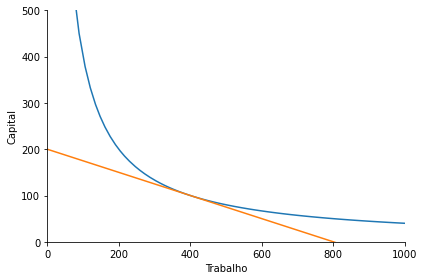

In [18]:
custo = w*400 + r*100
isoquanta = (3200/(16*sqrt(L)))**2
isocusto = (custo - w*L)/r
plot(isoquanta, isocusto, (L, 0, 1000), ylim = (0, 500), xlim = (0, 1000), xlabel = 'Trabalho', ylabel = 'Capital')

# Exemplo 4: Mercados competitivos

$ CT = 12500 + 10Q + 0.05Q^2 $

In [19]:
Q = symbols('Q')
P = 80
CT = 12500 + 10*Q + 0.05*Q**2
CMg = diff(CT, Q)
solve(Eq(P, CMg))

[700.000000000000]

In [20]:
# Outra forma de resolver, usando a derivada primeira da função de lucro: 
Lucro = P*Q - CT
solve(diff(Lucro, Q))

[700.000000000000]

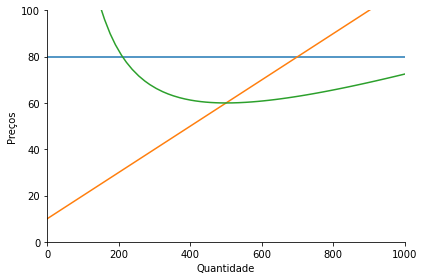

In [21]:
CMe = CT/Q
plot(P, CMg, CMe, (Q, 0, 1000), ylim=(0,100), xlim=(0,1000), xlabel="Quantidade", ylabel="Preços")

# Exemplo 5: Monopólio

Função de demanda:

$ P = 50 - 0.005Q $

Custo total do monopolista: 

$ CT = 12000 + 20Q + 0.0025Q^2$

In [22]:
Q = symbols('Q')
P = 50 - 0.005*Q
RT = P*Q
CT = 12000 + 20*Q + 0.0025*Q**2
RMg = diff(RT, Q)
CMg = diff(CT, Q)
solve(Eq(RMg, CMg))

[2000.00000000000]

In [23]:
Lucro = RT - CT
solve(diff(Lucro, Q))

[2000.00000000000]

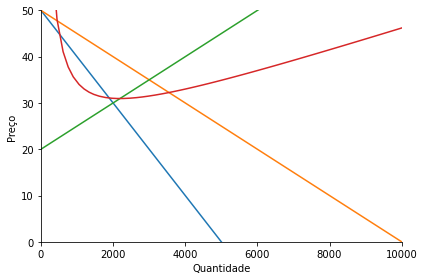

In [24]:
CMe = CT/Q
plot(RMg, P, CMg, CMe, (Q, 0, 10000), ylim = (0, 50), xlim = (0, 10000), xlabel = "Quantidade", ylabel = "Preço" )

# Exemplo 6: Discriminação de preços de terceiro grau

Função demanda inversa de A: 

$ Pa = 100 - 0.2Qa $

Função demanda inversa de B: 

$ Pb = 80 - 0.1Qb $

Custo total: 

$ CT = 14000 + 5Q + 0.05Q^2 $



In [25]:
Qa, Qb = symbols('Qa, Qb')
Q = Qa + Qb # Quantidade total
Pa = 100 - 0.2*Qa # Demanda de A
Pb = 80 - 0.1*Qb # Demanda de B
RTa = Pa*Qa # Receita total de A
RTb = Pb*Qb # Receita total de B
CT = 14000 + 5*Q + 0.05*Q**2 # Custo total
RMga = diff(RTa, Qa) # Receita Marginal de A
RMgb = diff(RTb, Qb) # Receita Marginal de B
CMga = diff(CT, Qa) # Custo Marginal de A
CMgb = diff(CT, Qb) # Custo Marginal de B
solve((Eq(RMga, CMga), Eq(RMgb, CMgb)))

{Qa: 150.000000000000, Qb: 200.000000000000}

In [26]:
Lucro = (RTa + RTb) - CT
Resultado = solve((diff(Lucro, Qa), diff(Lucro, Qb)))

In [27]:
Pa.subs(Qa, Resultado[Qa])

70.0000000000000

In [28]:
Pb.subs(Qb, Resultado[Qb])

60.0000000000000

# Exemplo 7: Modelo de Cournot

Demanda: 

$ P = 120 - 0.5Q $

$ CMg_1 = 20, CMg_2 = 34 $

In [29]:
Q1, Q2 = symbols('Q1, Q2')
P = 120 - 0.5*(Q1 + Q2) # Demanda
RT1, RT2 = P*Q1, P*Q2 # Receita marginal para 1 e 2 
RMg1, RMg2 = diff(RT1, Q1), diff(RT2, Q2)
CMg1, CMg2 = 20, 34
solve((Eq(RMg1, CMg1), Eq(RMg2, CMg2)))

{Q1: 76.0000000000000, Q2: 48.0000000000000}

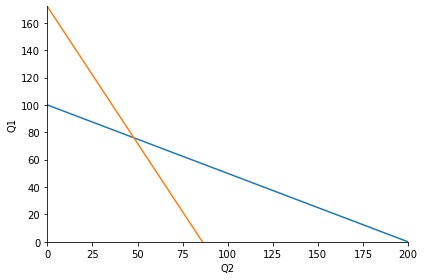

In [30]:
# Funções de reação: 
Lucro1 = RT1 - (20*Q1) # Lucro de 1
Lucro2 = RT2 - (34*Q2) # Lucro de 2
R1 = solve(diff(Lucro1, Q1), Q1) # Função reação de 1
R2 = solve(diff(Lucro2, Q2), Q1) # Função reação de 2
plot(R1[0], R2[0], (Q2, 0, 200), xlim = (0, 200), ylim = (0, 172), xlabel = "Q2", ylabel = "Q1")

## Exemplo 8: Stackelberg

Demanda: 

$ P = 120 - 0.5Q $

$ CMg_1 = 20, CMg_2 = 34 $

In [31]:
Q1, Q2 = symbols('Q1, Q2')
P = 120 - 0.5*(Q1 + Q2) # Demanda
Lucro2 = P*Q2 - (34*Q2) # Lucro de 2
R2 = solve(diff(Lucro2, Q2), Q2) # Reação da firma 2
P1 = P.subs(Q2, R2[0]) # Firma 1 usa a reação de 2 na função de demanda
Lucro1 = P1*Q1 - (20*Q1) # Lucro de 1
Q1r = solve(diff(Lucro1, Q1))
Q1r[0]

114.000000000000

In [32]:
Q2r = R2[0].subs(Q1, Q1r[0])
Q2r

29.0000000000000

## Exemplo 9: Modelo de Bertrand

$ Q_1 = 400 - 4P_1 + 2P_2 $

$ Q_2 = 240 - 3P_2 + 1.5P_1 $

$ CMg_1 = CMg_2 = 0 $

In [33]:
P1, P2 = symbols('P1, P2')
Q1 = 400 - 4*P1 + 2*P2 # Curva de demanda de 1
Q2 = 240 - 3*P2 + 1.5*P1  # Curva de demanda de 2
CMg1 = diff(P1*Q1, P1) # Custo maginal de 1
CMg2 = diff(P2*Q2, P2) # Custo marginal de 2
solve((CMg1, CMg2)) 

{P1: 64.0000000000000, P2: 56.0000000000000}

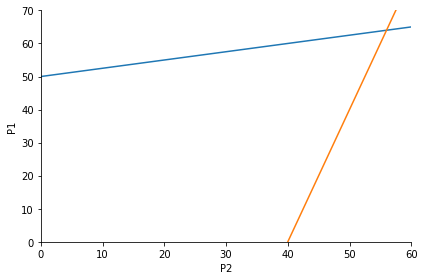

In [34]:
# Gráfico das curvas de reação no modelod e Bertrand
P1, P2 = symbols('P1, P2')
Lucro1, Lucro2 = P1*Q1, P2*Q2 # Lucro de cada firma
R1 = solve(diff(Lucro1, P1), P1) # Curva de reação da firma 1
R2 = solve(diff(Lucro2, P2), P1) # Curva de reação da firma 2
plot(R1[0], R2[0], (P2, 0, 60), xlim = (0, 60), ylim = (0, 70), xlabel = "P2", ylabel = "P1")